This is the documentation for "M1M2: Deep-Learning-Based Real-Time Emotion Recognition from Neural Activity" paper by

Sumya Akter 1†, Rumman Ahmed Prodhan 1†, Tanmoy Sarkar Pias 2* , David Eisenberg 3*
and Jorge Fresneda Fernandez 1

1.   Martin Tuchman School of Management, New Jersey Institute of Technology, Newark, NJ 07102, USA 
2.   Department of Computer Science, Virginia Tech, Blacksburg, VA 24061, USA
3. Department of Information Systems, Ying Wu College of Computing, New Jersey Institute of Technology, Newark, NJ 07102, USA

\* Correspondence: tanmoysarkar@vt.edu (T.S.P.); de63@njit.edu (D.E.)

† These authors contributed equally to this work.

Published in MDPI Sensors: https://www.mdpi.com/1424-8220/22/21/8467








Table 6. Results summary of two-class classifications of valence and arousal from DEAP dataset with LSTM, BiLSTM, and CNN models using
raw EEG data

**Pyeeg has been installed**

In [ ]:
pip install git+https://github.com/forrestbao/pyeeg.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/forrestbao/pyeeg.git to /tmp/pip-req-build-3cu6hnz8
  Running command git clone -q https://github.com/forrestbao/pyeeg.git /tmp/pip-req-build-3cu6hnz8
  Created wheel for pyeeg: filename=pyeeg-0.4.4-py2.py3-none-any.whl size=28131 sha256=d40f8b06a009c5d0c178be2075bc94c09c63af701edf1c4e002800fa25274c72
  Stored in directory: /tmp/pip-ephem-wheel-cache-wqgllp1n/wheels/b0/23/e4/703c908bda656959957029fa145879aa79307b2545a2ef0271
Successfully built pyeeg


**Here is the code for mounting google drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pyeeg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Imported the necessery library packages**

In [ ]:
import numpy as np
import pyeeg as pe
import pickle as pickle
import pandas as pd
import math

from sklearn import svm
from sklearn.preprocessing import normalize

import os
import time

import pandas as pd
import keras.backend as K
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.convolutional import Conv1D
from tensorflow.keras.utils import to_categorical 
from keras.layers import Flatten
from keras.layers import Dense
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras import backend as K
from keras.models import Model
import timeit
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution1D, MaxPooling1D, ZeroPadding1D
import warnings
warnings.filterwarnings('ignore')

from keras.layers import Convolution1D, ZeroPadding1D, MaxPooling1D, BatchNormalization, Activation, Dropout, Flatten, Dense
from keras.regularizers import l2
from keras.layers import Input
from keras.layers.merge import concatenate
from keras.layers import Input
from keras.layers.merge import concatenate
from keras.utils.vis_utils import plot_model

from keras.layers import Input
from keras.layers.merge import concatenate
from keras.utils.vis_utils import plot_model

**Location of dat file and location for where to save preprocessed npy files**

In [ ]:
path_to_dataset_2 = '/content/drive/Shareddrives/DEAP EEG/Dataset/physiological_recordings/data_preprocessed_python/' #Location of dat file of DEAP dataset
path_to_dataset = '/content/drive/Shareddrives/DEAP EEG/Preprocessed_data/MDPI_Raw_Data/' #where to save preprocessed npy files

In [ ]:
import pickle
data_training = []
label_training = []
data_testing = []
label_testing = []
subjects_list = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32']
for sub in subjects_list:
    path = "/content/drive/Shareddrives/DEAP EEG/Dataset/physiological_recordings/data_preprocessed_python/s"+sub+".dat"
    x = pickle.load(open(path, 'rb'), encoding = 'latin1')
    sub_data = x['data']
    sub_labels = x['labels']
    sub_data_training = sub_data[:30, :, :]
    sub_label_training = sub_labels[:30,:] 
    sub_data_testing = sub_data[30:, :, :]
    sub_label_testing = sub_labels[30:, :] 
    #dataset = convert_transpose(sub_eeg)
    data_training.extend(sub_data_training)
    label_training.extend(sub_label_training)
    data_testing.extend(sub_data_testing)
    label_testing.extend(sub_label_testing)
data_training = np.array(data_training)
label_training = np.array(label_training)
data_testing = np.array(data_testing)
label_testing = np.array(label_testing)

In [ ]:
data_training.shape

(960, 40, 8064)

In [ ]:
data_testing.shape

(320, 40, 8064)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(data_training[0]))
print(scaler.mean_)

from sklearn.preprocessing import StandardScaler
for instance in range(data_training.shape[0]):
  data_training[instance] = scaler.transform(data_training[instance])

for instance in range(data_testing.shape[0]):
  data_testing[instance] = scaler.transform(data_testing[instance])

StandardScaler()
[ -48.41196474  -38.02811722  -27.45047511 ... -406.35030622 -399.53196009
 -393.58519423]


In [ ]:
Valence_Train = np.ravel(label_training[:, [0]])
Arousal_Train = np.ravel(label_training[:, [1]])
Domain_Train = np.ravel(label_training[:, [2]])
Like_Train = np.ravel(label_training[:, [3]])

Valence_Test = np.ravel(label_testing[:, [0]])
Arousal_Test = np.ravel(label_testing[:, [1]])
Domain_Test = np.ravel(label_testing[:, [2]])
Like_Test = np.ravel(label_testing[:, [3]])

In [ ]:
count_0 = 0
count_1 = 0
Z = np.ravel(Arousal_Train)
for i in range(len(Z)):
  if Z[i] >= 1 and Z[i]<=4.99:
    Z [i] = 0
    count_0 = count_0 + 1
  else:
    Z [i] = 1
    count_1 = count_1 + 1
print(count_0,count_1)

count_0 = 0
count_1 = 0
L = np.ravel(Arousal_Test)
for i in range(len(L)):
  if L[i] >= 1 and L[i]<=4.99:
    L[i] = 0
    count_0 = count_0 + 1
  else:
    L[i] = 1
    count_1 = count_1 + 1
print(count_0,count_1)

437 523
89 231


In [ ]:
y_train = to_categorical(Z)
y_test = to_categorical(L)

In [ ]:
import tensorflow as tf

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((data_training, y_train))
test_dataset= tf.data.Dataset.from_tensor_slices((data_testing, y_test))

In [ ]:
train_dataset

<TensorSliceDataset element_spec=(TensorSpec(shape=(40, 8064), dtype=tf.float64, name=None), TensorSpec(shape=(2,), dtype=tf.float32, name=None))>

In [ ]:
batch_size = 256
num_classes = 2
epochs = 100

#input_shape=(x_train.shape[1], 1)

# Deep Learning Algorithms

## LSTM

##Arousal

In [ ]:
# LSTM Examples: https://keras.io/examples/nlp/bidirectional_lstm_imdb/
# https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/ 
# LSTM for international airline passengers problem with time step regression framing
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# reshape input to be [samples, time steps, features]
#trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
#testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(100, input_shape=(40, 8064), return_sequences=True))
model.add(LSTM(100))
model.add(Dense(20))
model.add(Dropout(0.2))
model.add(Dense(2))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])
model.fit(data_training, y_train, epochs=100, batch_size=100, verbose=1,validation_data=(data_testing, y_test))

Epoch 1/100
10/10 [==============================] - 7s 279ms/step - loss: 5.4251 - accuracy: 0.5167 - val_loss: 2.5796 - val_accuracy: 0.7219
Epoch 2/100
10/10 [==============================] - 1s 106ms/step - loss: 3.1798 - accuracy: 0.5031 - val_loss: 0.9349 - val_accuracy: 0.7312
Epoch 3/100
10/10 [==============================] - 1s 107ms/step - loss: 2.0814 - accuracy: 0.5146 - val_loss: 1.5035 - val_accuracy: 0.3219
Epoch 4/100
10/10 [==============================] - 1s 105ms/step - loss: 1.3061 - accuracy: 0.5240 - val_loss: 0.6289 - val_accuracy: 0.7156
Epoch 5/100
10/10 [==============================] - 1s 106ms/step - loss: 0.8304 - accuracy: 0.5542 - val_loss: 0.7072 - val_accuracy: 0.4875
Epoch 6/100
10/10 [==============================] - 1s 107ms/step - loss: 0.7339 - accuracy: 0.5312 - val_loss: 0.6609 - val_accuracy: 0.6812
Epoch 7/100
10/10 [==============================] - 1s 105ms/step - loss: 0.7177 - accuracy: 0.5635 - val_loss: 0.6686 - val_accuracy: 0.6656

In [ ]:
y_true = np.array(y_test)
y_pred = model.predict(data_testing)

y_pred = np.squeeze(y_pred)
y_pred = np.array(y_pred >= 0.5, dtype=np.int)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.27      0.60      0.37        89
           1       0.70      0.44      0.54       231

   micro avg       0.45      0.48      0.47       320
   macro avg       0.49      0.52      0.46       320
weighted avg       0.58      0.48      0.49       320
 samples avg       0.43      0.48      0.45       320



# Valance

In [ ]:
# LSTM Examples: https://keras.io/examples/nlp/bidirectional_lstm_imdb/
# https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/ 
# LSTM for international airline passengers problem with time step regression framing
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# reshape input to be [samples, time steps, features]
#trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
#testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(100, input_shape=(40, 8064), return_sequences=True))
model.add(LSTM(100))
model.add(Dense(20))
model.add(Dropout(0.2))
model.add(Dense(2))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])
model.fit(data_training, y_train, epochs=100, batch_size=100, verbose=1,validation_data=(data_testing, y_test))

Epoch 1/100
10/10 [==============================] - 4s 190ms/step - loss: 2.5329 - accuracy: 0.5990 - val_loss: 6.1735 - val_accuracy: 0.2531
Epoch 2/100
10/10 [==============================] - 1s 81ms/step - loss: 1.3864 - accuracy: 0.5990 - val_loss: 1.8227 - val_accuracy: 0.3375
Epoch 3/100
10/10 [==============================] - 1s 82ms/step - loss: 0.9035 - accuracy: 0.6344 - val_loss: 0.7767 - val_accuracy: 0.3594
Epoch 4/100
10/10 [==============================] - 1s 81ms/step - loss: 0.7745 - accuracy: 0.5906 - val_loss: 0.8804 - val_accuracy: 0.2875
Epoch 5/100
10/10 [==============================] - 1s 80ms/step - loss: 0.6565 - accuracy: 0.6604 - val_loss: 0.9272 - val_accuracy: 0.2625
Epoch 6/100
10/10 [==============================] - 1s 82ms/step - loss: 0.6369 - accuracy: 0.6729 - val_loss: 1.0287 - val_accuracy: 0.2531
Epoch 7/100
10/10 [==============================] - 1s 80ms/step - loss: 0.5993 - accuracy: 0.7010 - val_loss: 0.9221 - val_accuracy: 0.2531
Epoch

# Bi-LSTM

# Arousal

In [ ]:
# LSTM Examples: https://keras.io/examples/nlp/bidirectional_lstm_imdb/
# https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/ 
# LSTM for international airline passengers problem with time step regression framing
# Bi-LSTM https://analyticsindiamag.com/complete-guide-to-bidirectional-lstm-with-python-codes/#:~:text=Bidirectional%20long%2Dshort%20term%20memory(bi%2Dlstm)%20is,different%20from%20the%20regular%20LSTM.
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.layers import Dropout, Embedding, Bidirectional

# reshape input to be [samples, time steps, features]
#trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
#testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))

# create and fit the LSTM network
model = Sequential()
model.add(Bidirectional(LSTM(100, input_shape=(40,8064), return_sequences=True)))
model.add(Bidirectional(LSTM(100)))
model.add(Dense(20))
model.add(Dropout(0.2))
model.add(Dense(2))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])
model.fit(data_training, y_train, epochs=100, batch_size=100, verbose=1,validation_data=(data_testing, y_test))

Epoch 1/100
10/10 [==============================] - 10s 361ms/step - loss: 7.6063 - accuracy: 0.4542 - val_loss: 11.0715 - val_accuracy: 0.2781
Epoch 2/100
10/10 [==============================] - 1s 137ms/step - loss: 8.3555 - accuracy: 0.4552 - val_loss: 11.0715 - val_accuracy: 0.2781
Epoch 3/100
10/10 [==============================] - 1s 134ms/step - loss: 8.3555 - accuracy: 0.4552 - val_loss: 11.0715 - val_accuracy: 0.2781
Epoch 4/100
10/10 [==============================] - 1s 137ms/step - loss: 8.3555 - accuracy: 0.4552 - val_loss: 11.0715 - val_accuracy: 0.2781
Epoch 5/100
10/10 [==============================] - 1s 137ms/step - loss: 8.3555 - accuracy: 0.4552 - val_loss: 11.0715 - val_accuracy: 0.2781
Epoch 6/100
10/10 [==============================] - 1s 140ms/step - loss: 8.3555 - accuracy: 0.4552 - val_loss: 11.0715 - val_accuracy: 0.2781
Epoch 7/100
10/10 [==============================] - 1s 138ms/step - loss: 8.3555 - accuracy: 0.4552 - val_loss: 11.0715 - val_accuracy

# Valance

In [ ]:
# LSTM Examples: https://keras.io/examples/nlp/bidirectional_lstm_imdb/
# https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/ 
# LSTM for international airline passengers problem with time step regression framing
# Bi-LSTM https://analyticsindiamag.com/complete-guide-to-bidirectional-lstm-with-python-codes/#:~:text=Bidirectional%20long%2Dshort%20term%20memory(bi%2Dlstm)%20is,different%20from%20the%20regular%20LSTM.
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.layers import Dropout, Embedding, Bidirectional

# reshape input to be [samples, time steps, features]
#trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
#testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))

# create and fit the LSTM network
model = Sequential()
model.add(Bidirectional(LSTM(100, input_shape=(40,8064), return_sequences=True)))
model.add(Bidirectional(LSTM(100)))
model.add(Dense(20))
model.add(Dropout(0.2))
model.add(Dense(2))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])
model.fit(data_training, y_train, epochs=100, batch_size=100, verbose=1,validation_data=(data_testing, y_test))

Epoch 1/100
10/10 [==============================] - 9s 285ms/step - loss: 3.9141 - accuracy: 0.5917 - val_loss: 6.1383 - val_accuracy: 0.3594
Epoch 2/100
10/10 [==============================] - 1s 113ms/step - loss: 3.4115 - accuracy: 0.5771 - val_loss: 5.5747 - val_accuracy: 0.3750
Epoch 3/100
10/10 [==============================] - 1s 114ms/step - loss: 3.1473 - accuracy: 0.6552 - val_loss: 10.2296 - val_accuracy: 0.2562
Epoch 4/100
10/10 [==============================] - 1s 113ms/step - loss: 4.2789 - accuracy: 0.6646 - val_loss: 9.5081 - val_accuracy: 0.2656
Epoch 5/100
10/10 [==============================] - 1s 110ms/step - loss: 4.0768 - accuracy: 0.6583 - val_loss: 8.0533 - val_accuracy: 0.2812
Epoch 6/100
10/10 [==============================] - 1s 112ms/step - loss: 3.7445 - accuracy: 0.6562 - val_loss: 8.0677 - val_accuracy: 0.2719
Epoch 7/100
10/10 [==============================] - 1s 110ms/step - loss: 3.7225 - accuracy: 0.6740 - val_loss: 8.6064 - val_accuracy: 0.271

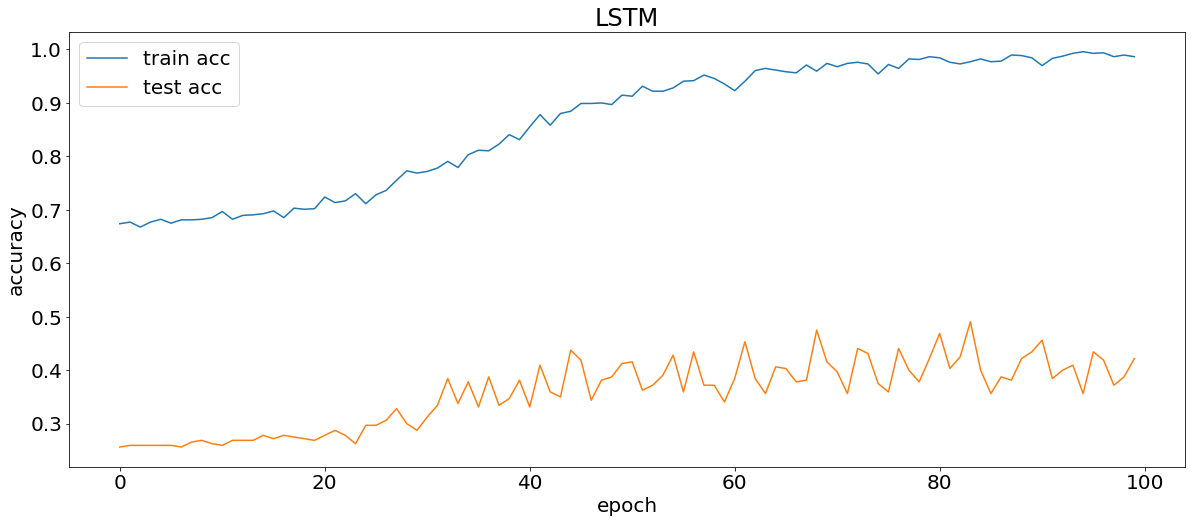

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,8)
plt.rcParams["font.size"] = 20

plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('LSTM')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train acc', 'test acc'], loc='upper left')
plt.savefig('/content/drive/Shareddrives/DEAP EEG/MDPI Sensor Journal/Paper figure/Bi-LSTM 100 epoch train and test accuracy curve.png', dpi=300)

In [ ]:
y_true = np.array(y_test)
y_pred = model.predict(data_testing)

y_pred = np.squeeze(y_pred)
y_pred = np.array(y_pred >= 0.5, dtype=np.int)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.17      0.28       239
           1       0.26      0.89      0.40        81

   micro avg       0.34      0.35      0.35       320
   macro avg       0.51      0.53      0.34       320
weighted avg       0.63      0.35      0.31       320
 samples avg       0.32      0.35      0.33       320



##CNN ( 4 Conv layers + 3 dense layers )

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 40, 8064)]   0           []                               
                                                                                                  
 conv1d_4 (Conv1D)              (None, 40, 32)       1548320     ['input_2[0][0]']                
                                                                                                  
 batch_normalization_4 (BatchNo  (None, 40, 32)      128         ['conv1d_4[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 max_pooling1d_4 (MaxPooling1D)  (None, 20, 32)      0           ['batch_normalization_4[0][

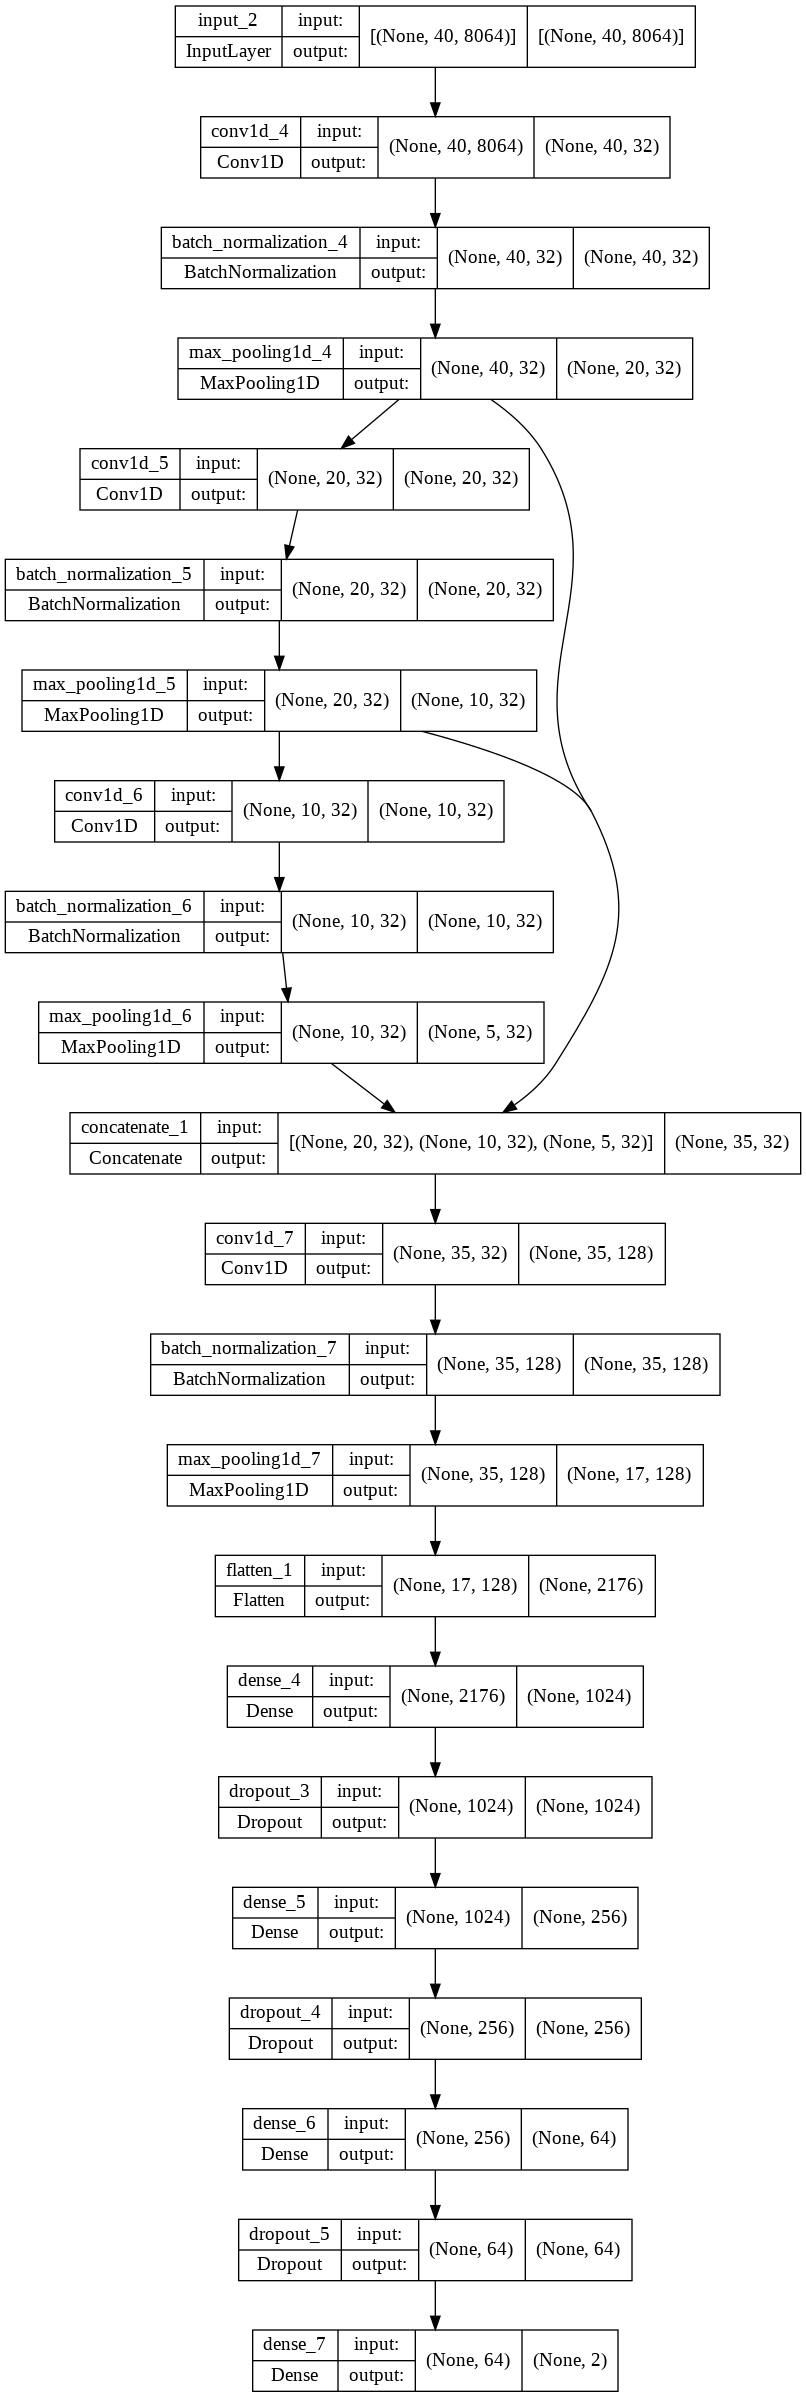

In [ ]:
from keras.layers import Input
from keras.layers.merge import concatenate
from keras.utils.vis_utils import plot_model


intput_shape=(40, 8064) #x_train.shape[1]

input_layer = Input(intput_shape)


conv1 = Conv1D(32, kernel_size=6,padding = 'same',activation='relu') (input_layer)
bn1 = BatchNormalization() (conv1)
pool1 = MaxPooling1D(pool_size=(2)) (bn1)

conv2 = Conv1D(32,kernel_size=6,padding = 'same', activation='relu') (pool1)
bn2 = BatchNormalization() (conv2) 
pool2 = MaxPooling1D(pool_size=(2)) (bn2)

conv3 = Conv1D(32,kernel_size=6,padding = 'same', activation='relu') (pool2)
bn3 = BatchNormalization() (conv3)
pool3 = MaxPooling1D(pool_size=(2)) (bn3)

connect1 = concatenate([pool1, pool2, pool3], axis=1)

conv4 = Conv1D(128,kernel_size=6,padding = 'same', activation='relu') (connect1)
bn4 = BatchNormalization() (conv4)
pool4 = MaxPooling1D(pool_size=(2)) (bn4)

flat = Flatten() (pool4)

dense1 = Dense(1024, activation='relu') (flat)
drop1 = Dropout(0.2) (dense1)

dense2 = Dense(256, activation='relu') (drop1)
drop2 = Dropout(0.2) (dense2)

dense3 = Dense(64, activation='relu') (drop2)
drop3 = Dropout(0.2) (dense3)

output_layer = Dense(2, activation='softmax') (drop3) #num_classes

model = Model(input_layer, output_layer)
model.summary()
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy, 
              optimizer='adam',
              metrics=['accuracy'])

# Arousal

In [ ]:
# check points and early stopping
from keras.callbacks import ModelCheckpoint,EarlyStopping

model_name = ""
filepath="/content/drive/Shareddrives/DEAP EEG/Models Saved/Arousal/Raw_MDPI_M1/"  + model_name + "weights-improvement-{epoch:02d}-{accuracy:.4f}.hdf5"
print(filepath)
checkpoint = ModelCheckpoint(filepath, monitor='accuracy', verbose=1, save_best_only=True, mode='max')
es = EarlyStopping(monitor='accuracy', mode='max', verbose=1, patience=10)
callbacks_list = [es, checkpoint]

/content/drive/Shareddrives/DEAP EEG/Models Saved/Arousal/Raw_MDPI_M1/weights-improvement-{epoch:02d}-{accuracy:.4f}.hdf5


Raw M1 Arousal

In [ ]:
#validation_data=(x_val, y_val),
H = model.fit(data_training, y_train,
          batch_size=200,
          epochs=100,
          verbose=1,
          validation_data=(data_testing, y_test), 
          callbacks= callbacks_list)

Epoch 1/100
5/5 [==============================] - ETA: 0s - loss: 1.1138 - accuracy: 0.5208
Epoch 1: accuracy improved from -inf to 0.52083, saving model to /content/drive/Shareddrives/DEAP EEG/Models Saved/Arousal/Raw_MDPI_M1/weights-improvement-01-0.5208.hdf5
5/5 [==============================] - 15s 422ms/step - loss: 1.1138 - accuracy: 0.5208 - val_loss: 0.9506 - val_accuracy: 0.3969
Epoch 2/100
5/5 [==============================] - ETA: 0s - loss: 0.9197 - accuracy: 0.5292
Epoch 2: accuracy improved from 0.52083 to 0.52917, saving model to /content/drive/Shareddrives/DEAP EEG/Models Saved/Arousal/Raw_MDPI_M1/weights-improvement-02-0.5292.hdf5
5/5 [==============================] - 1s 202ms/step - loss: 0.9197 - accuracy: 0.5292 - val_loss: 0.7609 - val_accuracy: 0.6375
Epoch 3/100
5/5 [==============================] - ETA: 0s - loss: 0.8681 - accuracy: 0.5354
Epoch 3: accuracy improved from 0.52917 to 0.53542, saving model to /content/drive/Shareddrives/DEAP EEG/Models Saved/A

# Valance

**Automatic save 
(We have saved all the details of every epoch in google drive so that we can use this when we need.)**


In [ ]:
# check points and early stopping
from keras.callbacks import ModelCheckpoint,EarlyStopping

model_name = ""
filepath="/content/drive/Shareddrives/DEAP EEG/Models Saved/Valence/Raw_MDPI_M1_Heavy/"  + model_name + "weights-improvement-{epoch:02d}-{accuracy:.4f}.hdf5"
print(filepath)
checkpoint = ModelCheckpoint(filepath, monitor='accuracy', verbose=1, save_best_only=True, mode='max')
es = EarlyStopping(monitor='accuracy', mode='max', verbose=1, patience=10)
callbacks_list = [es, checkpoint]

/content/drive/Shareddrives/DEAP EEG/Models Saved/Valence/Raw_MDPI_M1_Heavy/weights-improvement-{epoch:02d}-{accuracy:.4f}.hdf5


**Fit the model M1 Valence**


In [ ]:
#validation_data=(x_val, y_val),
H = model.fit(data_training, y_train,
          batch_size=200,
          epochs=100,
          verbose=1,
          validation_data=(data_testing, y_test), 
          callbacks= callbacks_list)

Epoch 1/100
5/5 [==============================] - ETA: 0s - loss: 0.8771 - accuracy: 0.6240
Epoch 1: accuracy improved from -inf to 0.62396, saving model to /content/drive/Shareddrives/DEAP EEG/Models Saved/Valence/Raw_MDPI_M1_Heavy/weights-improvement-01-0.6240.hdf5
5/5 [==============================] - 4s 372ms/step - loss: 0.8771 - accuracy: 0.6240 - val_loss: 2.6886 - val_accuracy: 0.2531
Epoch 2/100
5/5 [==============================] - ETA: 0s - loss: 0.8479 - accuracy: 0.6260
Epoch 2: accuracy improved from 0.62396 to 0.62604, saving model to /content/drive/Shareddrives/DEAP EEG/Models Saved/Valence/Raw_MDPI_M1_Heavy/weights-improvement-02-0.6260.hdf5
5/5 [==============================] - 1s 208ms/step - loss: 0.8479 - accuracy: 0.6260 - val_loss: 1.7303 - val_accuracy: 0.2531
Epoch 3/100
5/5 [==============================] - ETA: 0s - loss: 0.8672 - accuracy: 0.5865
Epoch 3: accuracy did not improve from 0.62604
5/5 [==============================] - 1s 139ms/step - loss: 